In [1]:
from SVM import SVM
from MLP import MLP
from OnlineHD_model import OnlineHD
from OnlineHDv1 import OnlineHDv1
from OnlineHDv2 import OnlineHDv2
from NeuralHDv1 import NeuralHDv1
from NeuralHDv2 import NeuralHDv2
from testcode import NeuralHDSpecial
from OnlineHD_model import OnlineHD
from BIC import NeuralHDBIC
import time
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
path="../../../Data/malware-classification/"
with open(path+'data11.npy', 'rb') as f:
    transxtrain=np.load(f)
    transx_test=np.load(f)
    transytrain=np.load(f)
    transy_test=np.load(f)
xtr=torch.from_numpy(transxtrain).float()
xte=torch.from_numpy(transx_test).float()
ytr=torch.from_numpy(transytrain).long()
yte=torch.from_numpy(transy_test).long()

In [3]:
model=SVM()
print("training")
start=time.time()
model.fit(transxtrain,transytrain)
end=time.time()
print(end-start)
print("inference")
start=time.time()
yhat=model(transx_test)
end=time.time()
print(end-start)

training
2.2941529750823975
inference
2.2652249336242676


In [29]:
trainings=[]
inferences=[]
for i in range(0,5):
    model=MLP(classes =9, features=257, dim = 2048)
    print("training")
    start=time.time()
    model.fit(transxtrain,transytrain,64,75,.001)
    end=time.time()
    training=end-start
    print("inference")
    start=time.time()
    yhat=model(transx_test)
    end=time.time()
    inference=end-start
trainings.append(training)
inferences.append(inference)
print(np.mean(trainings))
print(np.mean(inference))


training
(8151, 257) (8151, 9)
inference
training
(8151, 257) (8151, 9)


KeyboardInterrupt: 

In [5]:
model=OnlineHD(classes =9, features =257, dim = 1024)
print("training")
start=time.time()
model.fit(xtr,ytr,batch_size=64,epochs=75,lr=.02, one_pass_fit=False)
end=time.time()
print(end-start)
print("inference")
start=time.time()
yhat=model(xte)
end=time.time()
print(end-start)

training
0.02
75
64


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/OnlineHD_model.py:98: UserWarning: An output with one or more elements was resized since it had shape [82, 1024], which does not match the required output shape [33, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


9.488534927368164
inference
0.03784298896789551


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/OnlineHD_model.py:98: UserWarning: An output with one or more elements was resized since it had shape [28, 1024], which does not match the required output shape [1, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


In [7]:
model=OnlineHDv1(classes =9, features =257, dim = 1024, batch_size=64,lr=.0001)
print("training")
start=time.time()
model.fit(xtr,ytr,75)
end=time.time()
print(end-start)
print("inference")
start=time.time()
yhat=model(xte)
end=time.time()
print(end-start)

training


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/OnlineHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [184, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


9.29955792427063
inference
0.02536296844482422


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/OnlineHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [147, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


In [6]:
model=OnlineHDv2(classes =9, features =257, dim = 1024, batch_size=64,lr=.0001)
print("training")
start=time.time()
model.fit(xtr,ytr,75)
end=time.time()
print(end-start)
print("inference")
start=time.time()
yhat=model(xte)
end=time.time()
print(end-start)

training


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/OnlineHDv2.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [184, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


8.315061807632446
inference
0.0243680477142334


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/OnlineHDv2.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [147, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


In [8]:
model=NeuralHDv1(classes =9, features =257, dim = 1024, batch_size=64,lr=.0001)
print("training")
start=time.time()
model.fit(xtr,ytr,15,4,.1)
end=time.time()
print(end-start)
print("inference")
start=time.time()
yhat=model(xte)
end=time.time()
print(end-start)

training


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [82, 1024], which does not match the required output shape [33, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


9.853539228439331
inference
0.03726601600646973


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [28, 1024], which does not match the required output shape [1, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


In [5]:
model=NeuralHDv1(classes =9, features =257, dim = 1024, batch_size=64,lr=.0001)
print("training")
start=time.time()
model.fit(xtr,ytr,15,4,.1)
end=time.time()
print(end-start)
print("inference")
start=time.time()
yhat=model(xte)
end=time.time()
print(end-start)

training


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [184, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


9.753173828125
inference
0.026951313018798828


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv1.py:53: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [147, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


In [4]:
model=NeuralHDv2(classes =9, features =257, dim = 1024, batch_size=64,lr=.0001, multiencoder=False)
print("training")
start=time.time()
model.fit(xtr,ytr,35,5,.1)
end=time.time()
print(end-start)
print("inference")
start=time.time()
yhat=model(xte)
end=time.time()
print(end-start)
eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
acc=sum(eval)/len(transy_test)
acc

training


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv2.py:65: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [184, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


17.74828815460205
inference
0.03839516639709473


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/NeuralHDv2.py:65: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [147, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


tensor(0.9551)

test


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/testcode.py:62: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [184, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


71.6022322177887
inference
0.025948047637939453
tensor(0.9599)


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/testcode.py:62: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [147, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


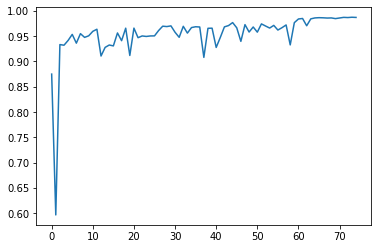

In [8]:
model=NeuralHDSpecial(9,257,1024,batch_size=1,trainopt=2,bestinclass=True,lr=.0001, multiencoder=True)
model.fit(xtr,ytr,45,0,0)
model.fit(xtr,ytr,15,1,0)
end=time.time()
print(end-start)
print("inference")
start=time.time()
yhat=model(xte)
end=time.time()
print(end-start)
eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
acc=sum(eval)/len(transy_test)
print(acc)
model.plot()

In [ ]:

factors=[1]#.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,
means=[]
medians=[]
deviations=[]
repetitions=10
for factor in factors:
    accs=[]
    print(factor)
    for repetition in range(0,repetitions):
        model=NeuralHDSpecial(9,257,1024,batch_size=1,trainopt=2,bestinclass=True,lr=.0001, multiencoder=True)
        model.fit(xtr[:int(transxtrain.shape[0]*factor),:],ytr[:int(transxtrain.shape[0]*factor)],45,0,0)
        model.fit(xtr[:int(transxtrain.shape[0]*factor),:],ytr[:int(transxtrain.shape[0]*factor)],6,4,0)
        yhat=model(xte)
        eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
        acc=sum(eval)/len(transy_test)
        accs.append(acc)
        
    print(accs)
    acc=np.mean(accs)
    median=np.median(accs)
    std=np.std(accs)
    means.append(acc)
    deviations.append(std)
    medians.append(median)
print("SingleStop 60:15 (45,15) batch size 1 lr=.0001")
plt.plot(factors,medians)
print(medians)
plt.show()
plt.plot(factors,means)
print(means)
plt.show()
plt.plot(factors,deviations)
print(deviations)
plt.show()

1
test


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/testcode.py:62: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [184, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)
/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/testcode.py:62: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [147, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero e

test
test
test
test
test
test
test
test
test
[tensor(0.9573), tensor(0.9591), tensor(0.9573), tensor(0.9569), tensor(0.9614), tensor(0.9562), tensor(0.9591), tensor(0.9569), tensor(0.9569), tensor(0.9588)]
SingleStop 60:15 (45,15) batch size 1 lr=.0001
[0.95730585]


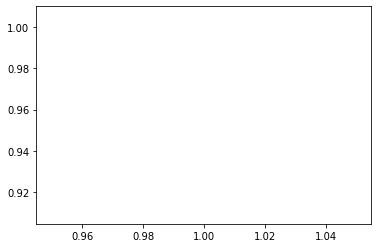

[0.95800513]


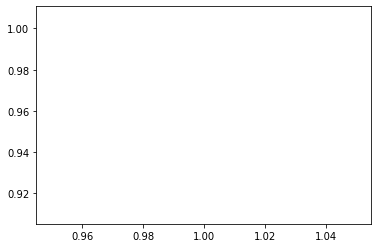

[0.0014855035]


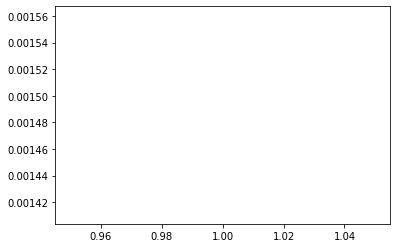

In [3]:

factors=[1]#.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,
means=[]
medians=[]
deviations=[]
repetitions=10
for factor in factors:
    accs=[]
    print(factor)
    for repetition in range(0,repetitions):
        model=NeuralHDSpecial(9,257,1024,batch_size=1,trainopt=2,bestinclass=True,lr=.0001, multiencoder=True)
        model.fit(xtr[:int(transxtrain.shape[0]*factor),:],ytr[:int(transxtrain.shape[0]*factor)],45,0,0)#45
        model.fit(xtr[:int(transxtrain.shape[0]*factor),:],ytr[:int(transxtrain.shape[0]*factor)],6,4,0)#6,4
        yhat=model(xte)
        eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
        acc=sum(eval)/len(transy_test)
        accs.append(acc)
        
    print(accs)
    acc=np.mean(accs)
    median=np.median(accs)
    std=np.std(accs)
    means.append(acc)
    deviations.append(std)
    medians.append(median)
print("SingleStop 60:15 (45,15) batch size 1 lr=.0001")
plt.plot(factors,medians)
print(medians)
plt.show()
plt.plot(factors,means)
print(means)
plt.show()
plt.plot(factors,deviations)
print(deviations)
plt.show()

1
test
test
test
test
test
test
test
test
test
test
[tensor(0.9632), tensor(0.9595), tensor(0.9569), tensor(0.9584), tensor(0.9555), tensor(0.9632), tensor(0.9577), tensor(0.9580), tensor(0.9632), tensor(0.9603)]
SingleStop 60:15 (45,15) batch size 1 lr=.0001
[0.9589621]


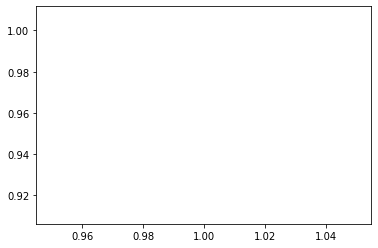

[0.95958775]


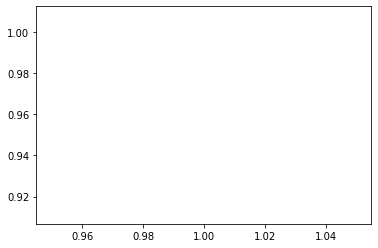

[0.0026632457]


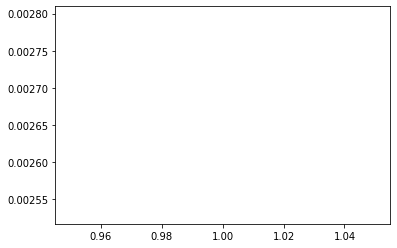

In [44]:
factors=[1]
means=[]
medians=[]
deviations=[]
repetitions=10
for factor in factors:
    accs=[]
    print(factor)
    for repetition in range(0,repetitions):
        model=NeuralHDSpecial(9,257,1024,batch_size=1,trainopt=2,bestinclass=True,lr=.0001, multiencoder=True)
        model.fit(xtr[:int(transxtrain.shape[0]*factor),:],ytr[:int(transxtrain.shape[0]*factor)],45,2,0)
        yhat=model(xte)
        eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
        acc=sum(eval)/len(transy_test)
        accs.append(acc)
        
    print(accs)
    acc=np.mean(accs)
    median=np.median(accs)
    std=np.std(accs)
    means.append(acc)
    deviations.append(std)
    medians.append(median)
print("SingleStop 60:15 (45,15) batch size 1 lr=.0001")
plt.plot(factors,medians)
print(medians)
plt.show()
plt.plot(factors,means)
print(means)
plt.show()
plt.plot(factors,deviations)
print(deviations)
plt.show()

test
training
28.616301774978638
inference
0.0254671573638916
tensor(0.9558)


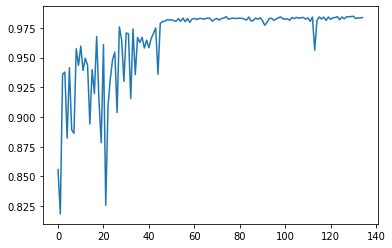

In [32]:
model=NeuralHDSpecial(9,257,1024,batch_size=4,trainopt=2,bestinclass=True,lr=.0001)
print("training")
start=time.time()
model.fit(xtr,ytr,45,2,.1)
end=time.time()
print(end-start)
print("inference")
start=time.time()
yhat=model(xte)
end=time.time()
print(end-start)
eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
acc=sum(eval)/len(transy_test)
print(acc)
model.plot()

In [32]:
model=NeuralHDSpecial(9,257,1024,batch_size=4,trainopt=2,bestinclass=True,lr=.0001)
print("training")
start=time.time()
model.fit(xtr,ytr,55,4,0)
end=time.time()
print(end-start)
print("inference")
start=time.time()
yhat=model(xte)
end=time.time()
print(end-start)

test
training


/Users/bobbymissirian/Files/Research/Cybersecurity/Experiments/testcode.py:61: UserWarning: An output with one or more elements was resized since it had shape [257, 1024], which does not match the required output shape [184, 1024].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  ../aten/src/ATen/native/Resize.cpp:23.)
  torch.matmul(x[i:i+bsize], self.basis.T, out=temp)


KeyboardInterrupt: 

In [14]:
model=NeuralHDSpecial(9,257,1024,batch_size=4,trainopt=2,bestinclass=True,lr=.0001)
print("training")
start=time.time()
model.fit(xtr,ytr,75,0,0)
end=time.time()
print(end-start)
print("inference")
start=time.time()
yhat=model(xte)
end=time.time()
print(end-start)

test
training
17.00200605392456
inference
0.04045677185058594


In [4]:
model=NeuralHDBIC(9,257,1024,batch_size=64,lr=.0001)
print("training")
start=time.time()
model.fit(xtr,ytr,15,4,.1)
end=time.time()
print(end-start)
print("inference")
start=time.time()
yhat=model(xte)
end=time.time()
print(end-start)
eval=[yhat[i]==transy_test[i] for i in range(len(transy_test))]
acc=sum(eval)/len(transy_test)
acc

test
training
7.696249723434448
inference
0.02670001983642578


tensor(0.9488)